In [10]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
from numpy import linalg as LA
from scipy.stats import unitary_group
from scipy.integrate import quad
from scipy import integrate
import random
# import concurrent.futures
import multiprocessing
import os
from scipy import stats
from mpl_toolkits import mplot3d
import scipy.integrate as spi
rho_a =1
rho_q=1
M =1

In [50]:
def samp_teta(observ): #samples-for CRB function (d_k)
    teta_samp = np.random.normal(0, 1, (M, observ))
    return  teta_samp.reshape(M,observ)

def CRB(sigma,thresh_real=0,observ=1000):
    sigma1 = 1
    na = 0 #nq = 1
    teta_samp = samp_teta(observ)
    g_teta = teta_samp
    zeta_real = ((1/sigma)*(g_teta.real-thresh_real))
    pdf_real = norm.pdf(zeta_real)
    d_vec = np.divide(np.power(pdf_real, 2), np.multiply(norm.cdf(zeta_real), (norm.cdf(-zeta_real))))
    d = np.mean(d_vec, axis=1) #converges to 0.95 aprox.
    J2 = np.sum(d,axis=0)*(1/(pow(sigma, 2)))
    J1 = (1 + (rho_a * na/ pow(sigma1, 2))) * np.identity(M)
    J = J1 + J2
    return LA.norm((LA.inv(J)).real,"fro")

In [51]:
def inner(theta,sigma2,s,h,thresh_real):
    return pow(norm.cdf((1/sigma2)*((theta+h)-thresh_real)),s)*\
    pow(norm.cdf((1/sigma2)*((theta)-thresh_real)),1-s)+\
    pow(norm.cdf(-(1/sigma2)*((theta+h)-thresh_real)),s)*\
    pow(norm.cdf(-(1/sigma2)*((theta)-thresh_real)),1-s)
def ratio_func(theta,sigma2,s,h,thresh_real):
    return pow(1/(math.sqrt(2*math.pi))*math.exp(-0.5*((theta+h)**2)),s)*pow(1/(math.sqrt(2*math.pi))*math.exp(-0.5*(theta**2)),1-s)*inner(theta,sigma2,s,h,thresh_real)
def etha(sigma2,s,h,thresh_real):
    expected_value, _ = quad(ratio_func,-15, 15, args=(sigma2,s,h,thresh_real))
    return math.log(expected_value)
def WWS(sigma2,s,h,thresh_real=0):
    return (h**2)*(math.e**(2*etha(sigma2,s,h,thresh_real)))/(2*(1-math.e**(etha(sigma2,s,2*h,thresh_real))))

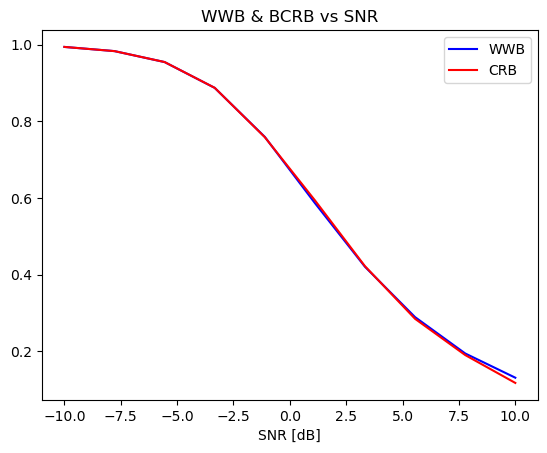

In [52]:
sigma_space_new = np.logspace(-1,1,10)
s= 0.5
h= 0.1
sigma_space_new = np.logspace(-1, 1, 10)
WWS1 = [WWS(sigma_space_new[i],s,h) for i in range(len(sigma_space_new))]
CRB1 = [CRB(sigma_space_new[i]) for i in range(len(sigma_space_new))]
plt.figure()
plt.plot(10*np.log10(1/sigma_space_new), WWS1, color = "blue", label = "WWB")
plt.plot(10*np.log10(1/sigma_space_new), CRB1, color = "red", label = "CRB")
plt.title("WWB & BCRB vs SNR")
plt.xlabel("SNR [dB]")
plt.legend()

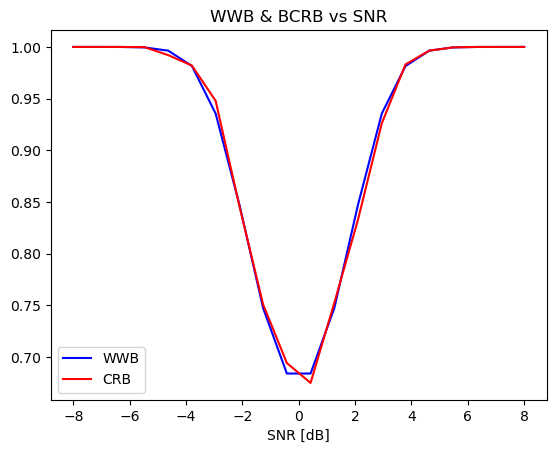

In [49]:
s= 0.5
h= 0.1
thresh_space = np.linspace(-8,8,20)
WWS1 = [WWS(1,s,h,thresh_space[i]) for i in range(len(thresh_space))]
CRB1 = [CRB(1,thresh_space[i]) for i in range(len(thresh_space))]
plt.figure()
plt.plot(thresh_space, WWS1, color = "blue", label = "WWB")
plt.plot(thresh_space, CRB1, color = "red", label = "CRB")
plt.title("WWB & BCRB vs SNR")
plt.xlabel("SNR [dB]")
plt.legend()

ZVI ZAKAI:

In [36]:
def Pmin(theta,h,sigma):
    P1 = norm.cdf((theta+h)/sigma)
    P2 = norm.cdf(theta/sigma)
    P3 = norm.cdf(-(theta+h)/sigma)
    P4 = norm.cdf(-theta/sigma)
    C1 = math.log(P1)
    C2 = math.log(P2)
    C3 = math.log(P3)
    C4 = math.log(P4)
    coun_1 = (math.sqrt(P1*P2)+math.sqrt(P3*P4))*((math.sqrt(P1*P2)*(C1**2+C2**2))
                                                  +(math.sqrt(P3*P4)*(C3**2+C4**2)))
    coun_2 = pow((math.sqrt(P1*P2)*(C1+C2))+(math.sqrt(P3*P4)*(C3+C4)),2)
    dev_mu = (coun_1-coun_2)/pow(math.sqrt(P1*P2)+math.sqrt(P3*P4),2)
    return norm.cdf((1/2)*math.sqrt(dev_mu))
Pmin(0,0,1)

ValueError: math domain error

In [23]:
def f(theta,h,sigma):
    return min(1/(math.sqrt(2*math.pi))*math.exp(-0.5*((theta+h)**2)),1/(math.sqrt(2*math.pi))*math.exp(-0.5*((theta)**2)))*Pmin(theta,h,sigma)*h

def ZVI(sigma):
    result, error = integrate.dblquad(f, -2, 2, 0,8,args=(sigma,))
    return result

In [25]:
sigma_space_new = np.logspace(0, 0.2, 10)
ZVI1 = [ZVI(sigma_space_new[i]) for i in range(len(sigma_space_new))]

ValueError: math domain error